# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [14]:
df = pd.read_csv('/Users/willmckanna/Downloads/MDST-Onboarding-main/data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

In [17]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [18]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.head()
df.isna().sum()
df.dropna(subset= ['AVG_MATH_8_SCORE'], inplace= True)

In [19]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

Grade 8 Math

How many years of data are logged in our dataset? 

In [20]:
year_range= df["YEAR"].max() - df["YEAR"].min()
print(year_range)
#Range is 29 years

29


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [21]:
df.groupby("STATE")['AVG_MATH_8_SCORE'].mean()
#Math 8 Average for Ohio = 282.25
#Math 8 Average for Michigan = 276.17
#Thus, Ohio has a higher average across all years in the test I chose :((

STATE
ALABAMA                 264.166667
ALASKA                  280.000000
ARIZONA                 274.666667
ARKANSAS                269.750000
CALIFORNIA              269.166667
COLORADO                283.181818
CONNECTICUT             282.250000
DELAWARE                277.181818
DISTRICT_OF_COLUMBIA    251.166667
DODEA                   287.200000
FLORIDA                 273.454545
GEORGIA                 272.833333
HAWAII                  269.583333
IDAHO                   281.833333
ILLINOIS                278.909091
INDIANA                 282.250000
IOWA                    283.818182
KANSAS                  286.100000
KENTUCKY                274.333333
LOUISIANA               265.500000
MAINE                   284.000000
MARYLAND                278.916667
MASSACHUSETTS           292.363636
MICHIGAN                276.166667
MINNESOTA               290.000000
MISSISSIPPI             264.454545
MISSOURI                279.272727
MONTANA                 286.818182
NATIONAL      

Find the average for your chosen test across all states in 2019

In [22]:
df.groupby("YEAR")['AVG_MATH_8_SCORE'].mean()
#The average for my chosen test across all states in 2019 is 281.26

YEAR
1990    263.000000
1992    266.325581
1996    270.000000
2000    271.404762
2003    276.943396
2005    277.867925
2007    280.773585
2009    282.509434
2011    283.584906
2013    284.113208
2015    281.905660
2017    282.113208
2019    281.264151
Name: AVG_MATH_8_SCORE, dtype: float64

For each state, find a maximum value for your chosen test score

In [23]:
df.groupby("STATE")['AVG_MATH_8_SCORE'].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [24]:
df['FEDERAL_FUNDING_PER_STUDENT'] = df["FEDERAL_REVENUE"] / df["ENROLL_ALL"]
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

I created 'FEDERAL_FUNDING_PER_STUDENT' because I believe that the amount of money that a state receives from the federal government per student will affect those students' scores on their Grade 8 math assessment, as federal funding is a crucial facet of school funding that will undoubtedly affect the ability of a student in any given state to do well on their Grade 8 math assessment.

I created 'INSTRUCTION_EXPENDITURE_PER_STUDENT' because I believe that the amount of money that a state spends on the instruction and teaching of children (on a per-student level) will affect the children's aptitude in math and ability to perform well on their Grade 8 Math assessment.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

**Visualization 1**

TypeError: 'str' object is not callable

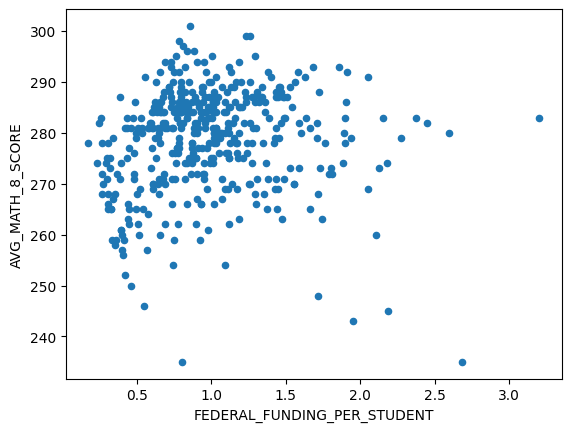

In [53]:
df.plot.scatter(y= 'AVG_MATH_8_SCORE', x= 'FEDERAL_FUNDING_PER_STUDENT')
plt.ylabel('Average Math 8 Score')
plt.xlabel('Federal Funding Per Student')

In this scatterplot, I charted the relationship between a state's average Grade 8 Math Score and the amount of federal funding they received per student. The generally amorphous shape of the distribution shows that the two variables do not have a strong, linear correlation. Thus, the amount of funding that a state receives from the federal government per student does not seem to have much of a measurable effect on the average Grade 8 Math Score of that state.

**Visualization 2**

TypeError: 'str' object is not callable

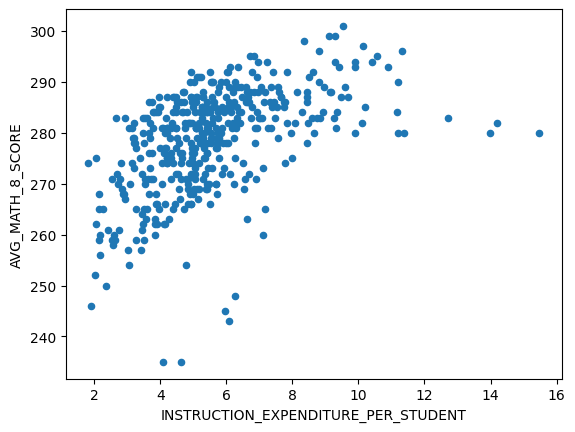

In [52]:
df.plot.scatter(y= 'AVG_MATH_8_SCORE', x= 'INSTRUCTION_EXPENDITURE_PER_STUDENT')
plt.ylabel('Average Grade 8 Math Score')
plt.xlabel('Instruction Expenditure Per Student')

**<CAPTION FOR VIZ 2>**

In this scatterplot, I charted the relationship between a state's average Grade 8 Math Score and the amount of money a state spends on instruction per student. This distribution bears a striking resemblence to that of Visualization 1, in which I plotted the average Grade 8 math score against the federal funding per student of a given state. This similarity makes sense, as states who receive more funding from the federal government are more likely to spend a greater amount of money per student on instruction expenditures. However, the scatterplot of this distribution appears to have a greater correlation coefficient than that of Visualization 1. Because of this, the graph in Visualization 2 appears to have a slightly stronger positive, linear correlation than the graph in visualization 1. From this noticing, we can conclude without computing that the amount of money that a given state spends on instruction has a greater effect on the average score of that state's Math 8 assessment than the amount of money that state receives in funding from the federal government.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [27]:
from sklearn.model_selection import train_test_split

In [33]:
X = df[['INSTRUCTION_EXPENDITURE_PER_STUDENT','FEDERAL_FUNDING_PER_STUDENT','AVG_MATH_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
# create your model here
model = LinearRegression()

In [36]:
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [40]:
model.score(X_test, y_test)
np.mean(model.predict(X_test)-y_test)
np.mean((model.predict(X_test)-y_test)**2)**0.5

np.float64(4.167135955311383)

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

TypeError: 'str' object is not callable

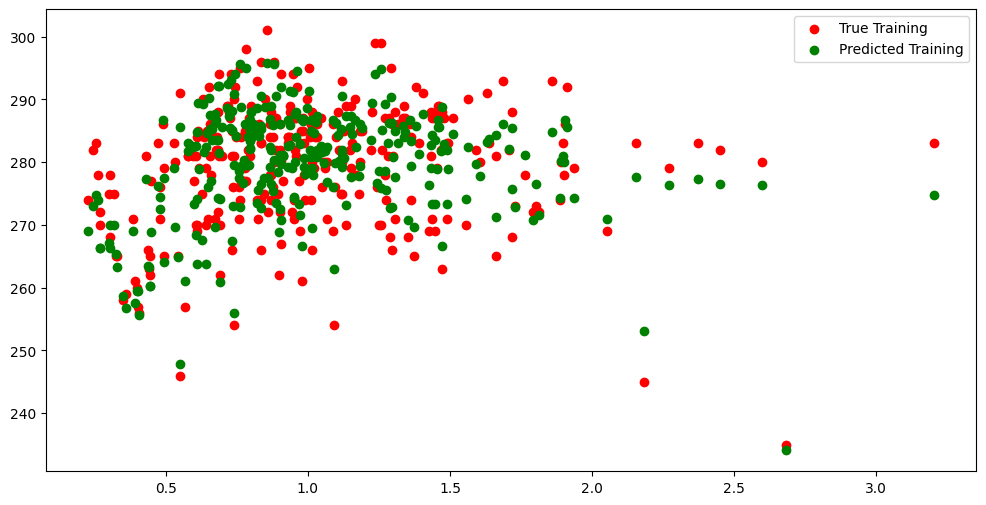

In [48]:
col_name = 'FEDERAL_FUNDING_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")

TypeError: 'str' object is not callable

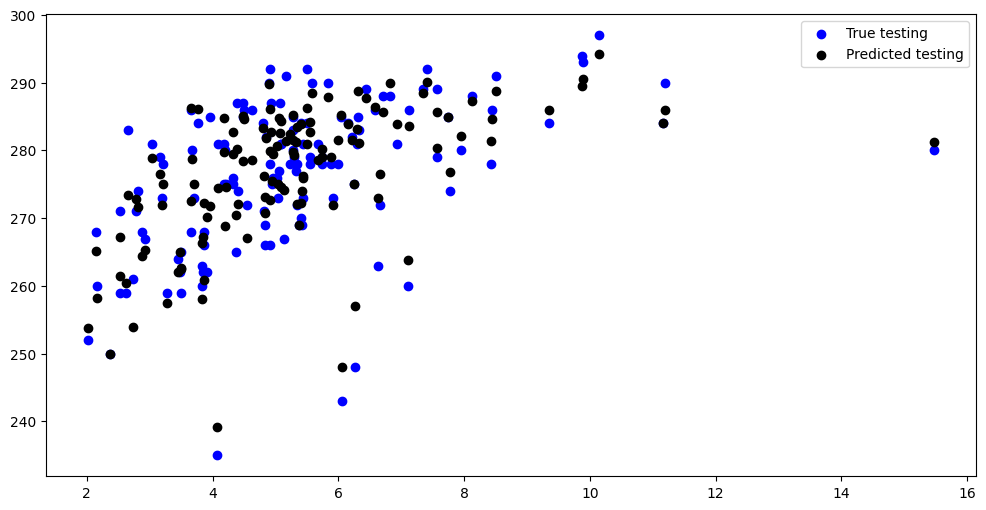

In [50]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average Math 8 Score')
plt.title("Model Behavior on Testing Set")

TypeError: 'str' object is not callable

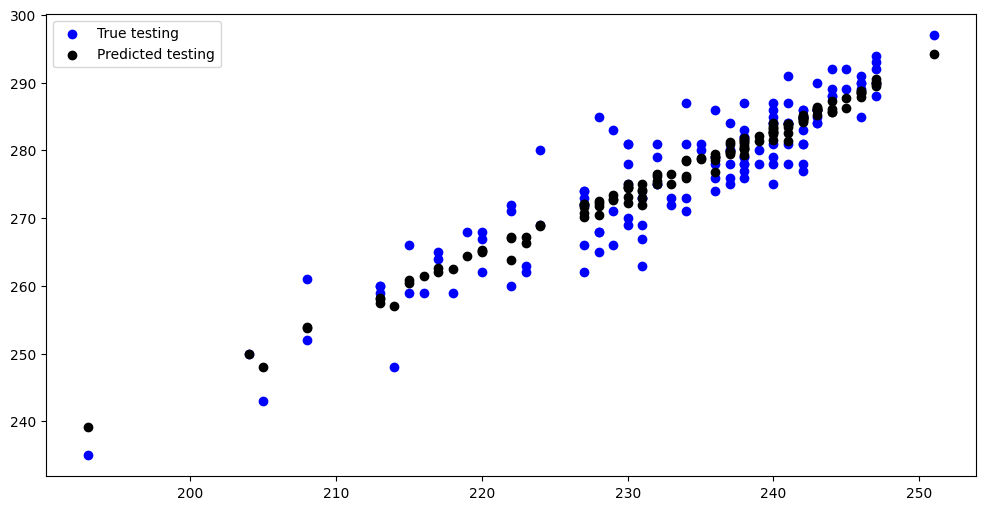

In [51]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average Math 8 Score')
plt.title("Model Behavior on Testing Set")